In [1]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\yasha\Desktop\Ashish\sem 7\DL\Datasets\mnist_784_csv.csv",delimiter=',')
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [5]:
x_train = df.iloc[:, 1:].values
y_train = df.iloc[:, 0].values

In [6]:
# Reshape and normalize the data
x_train = x_train / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28)


In [6]:
# Add noise to the data
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

In [7]:
# Define the model
model = Sequential()
model.add(Dense(500, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
# Train the model
H = model.fit(x_train_noisy.reshape(-1, 28 * 28), x_train.reshape(-1, 28 * 28), epochs=20, batch_size=100)

Epoch 1/20
700/700 [==============================] - 12s 17ms/step - loss: 0.0280
Epoch 2/20
700/700 [==============================] - 10s 14ms/step - loss: 0.0120
Epoch 3/20
700/700 [==============================] - 11s 15ms/step - loss: 0.0096
Epoch 4/20
700/700 [==============================] - 9s 14ms/step - loss: 0.0083
Epoch 5/20
700/700 [==============================] - 15s 21ms/step - loss: 0.0076
Epoch 6/20
700/700 [==============================] - 14s 20ms/step - loss: 0.0072
Epoch 7/20
700/700 [==============================] - 13s 19ms/step - loss: 0.0068
Epoch 8/20
700/700 [==============================] - 13s 19ms/step - loss: 0.0065
Epoch 9/20
700/700 [==============================] - 13s 19ms/step - loss: 0.0062
Epoch 10/20
700/700 [==============================] - 13s 19ms/step - loss: 0.0060
Epoch 11/20
700/700 [==============================] - 13s 19ms/step - loss: 0.0059
Epoch 12/20
700/700 [==============================] - 13s 19ms/step - loss: 0.0057
Ep

In [9]:
pred = model.predict(x_train_noisy.reshape(-1, 28 * 28))
pred = pred.reshape(pred.shape[0], 28, 28)

2188/2188 [==============================] - 62s 28ms/step


In [ ]:
import random
n = random.randint(0, x_train.shape[0] - 1)
print("Input")
plt.imshow(x_train_noisy[n])  # Specify cmap='gray' for grayscale images
plt.show()

Input


Output


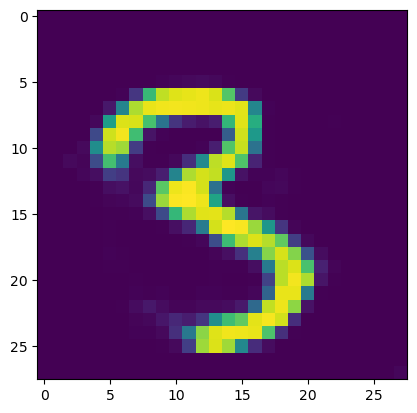

In [133]:
print("Output")
plt.imshow(pred[n])
plt.show()